In [1]:
import math
from IPython import get_ipython
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

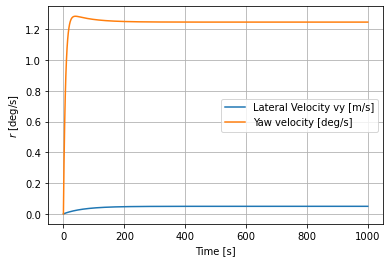

In [4]:
Izz = 1500
m = 1000
delta = 0.017
C_alpha_1 = 5000
C_alpha_2 = 5000
C_alpha_3 = 5000
slip_angle_1 = 0
slip_angle_2 = 0
slip_angle_3 = 0
yaw_dot_dot = 0
yaw_dot = 0
vx = 10
vy = 0
a1 = 5.5
b1 = 2
b2 = 2.5
ay = 0
Fy_1 = 0
Fy_2 = 0
Fy_3 = 0



t = 0.01
simulation_time = 100

vy = np.empty([int(10/t)])
yaw_dot = np.empty([int(10/t)])




vy[0] = 0
yaw_dot[0] = 0


for i in range(1, int(10/t)):
    slip_angle_1 = (delta - (vy[i-1] + a1*yaw_dot[i-1])/vx)
    slip_angle_2 = ((b1*yaw_dot[i-1] - vy[i-1])/vx)
    slip_angle_3 = ((b2*yaw_dot[i-1] - vy[i-1])/vx)
    Fy_1 = C_alpha_1 * slip_angle_1
    Fy_2 = C_alpha_2 * slip_angle_2
    Fy_3 = C_alpha_3 * slip_angle_3


    ay = (Fy_1 * math.cos(delta) + Fy_2 + Fy_3)/m
    yaw_dot_dot = (a1*Fy_1*math.cos(delta) - b1*Fy_2 - b2*Fy_3)/Izz

    vy[i] = ay*t + vy[i-1]
    yaw_dot[i] = yaw_dot_dot*t + yaw_dot[i-1]


ti = range(0, int(10/t))

plt.figure()
plt.plot(ti, vy)
plt.plot(ti, yaw_dot*57)
plt.xlabel("Time [s]")
plt.ylabel("$r$ [deg/s]")
plt.legend(["Lateral Velocity vy [m/s]","Yaw velocity [deg/s]"])
plt.grid(True)


